## Preparar el entorno de trabajo

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from collections import Counter
import joblib

## Importar los datos

In [2]:
# Lista para almacenar todos los DataFrames individuales
dfs = []

# Ruta a los archivos CSV
file_paths = glob.glob('/home/alanv/Documents/7/Reto/*.csv')

# Cargamos los DataFrames individuales y se agregan a la lista
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
global_df = pd.concat(dfs, ignore_index=True)

# Mostrar información del DataFrame combinado
global_df

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2021-04-14 14:28:07.599,-1.324951,-0.359131,0.391113,-0.984863,0.460693,0.451660,6
1,2021-04-14 14:28:07.619,-1.374268,-0.158691,0.380371,-0.590820,0.639648,0.812988,6
2,2021-04-14 14:28:07.640,-1.040039,0.018311,0.303955,-0.584717,0.324951,0.538574,6
3,2021-04-14 14:28:07.659,-0.819824,0.110352,0.169678,-0.859375,-0.045410,-0.064941,6
4,2021-04-14 14:28:07.680,-0.925781,0.082275,0.195312,-1.222900,-0.280518,-0.486084,6
...,...,...,...,...,...,...,...,...
1832555,2021-04-13 15:11:49.180,-0.964600,-0.093506,0.291260,-0.969238,-0.116699,-0.187012,1
1832556,2021-04-13 15:11:49.200,-0.968750,-0.087891,0.277344,-1.021729,-0.141113,-0.210693,1
1832557,2021-04-13 15:11:49.220,-0.974609,-0.068115,0.289062,-1.026367,-0.179932,-0.192383,1
1832558,2021-04-13 15:11:49.240,-0.990234,-0.058594,0.296631,-1.017090,-0.130859,-0.150879,1


## Preparar la muestra de conjuntos de prueba y de entrenamiento

In [ ]:
# using 3 dataframes set x and y
df_501 = pd.read_csv('501.csv')
df_502 = pd.read_csv('502.csv')
df_503 = pd.read_csv('503.csv')

data = pd.concat([df_501,df_502,df_503])
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

## Random Forest (no lineal) usando diferentes datasets

In [ ]:
# Run model without balancing and only 3 csv files
# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    print('Split')
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    clf = RandomForestClassifier() #class_weight='balanced'
    print('FIt')
    clf.fit(x_train, y_train)
    print('FItted')
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

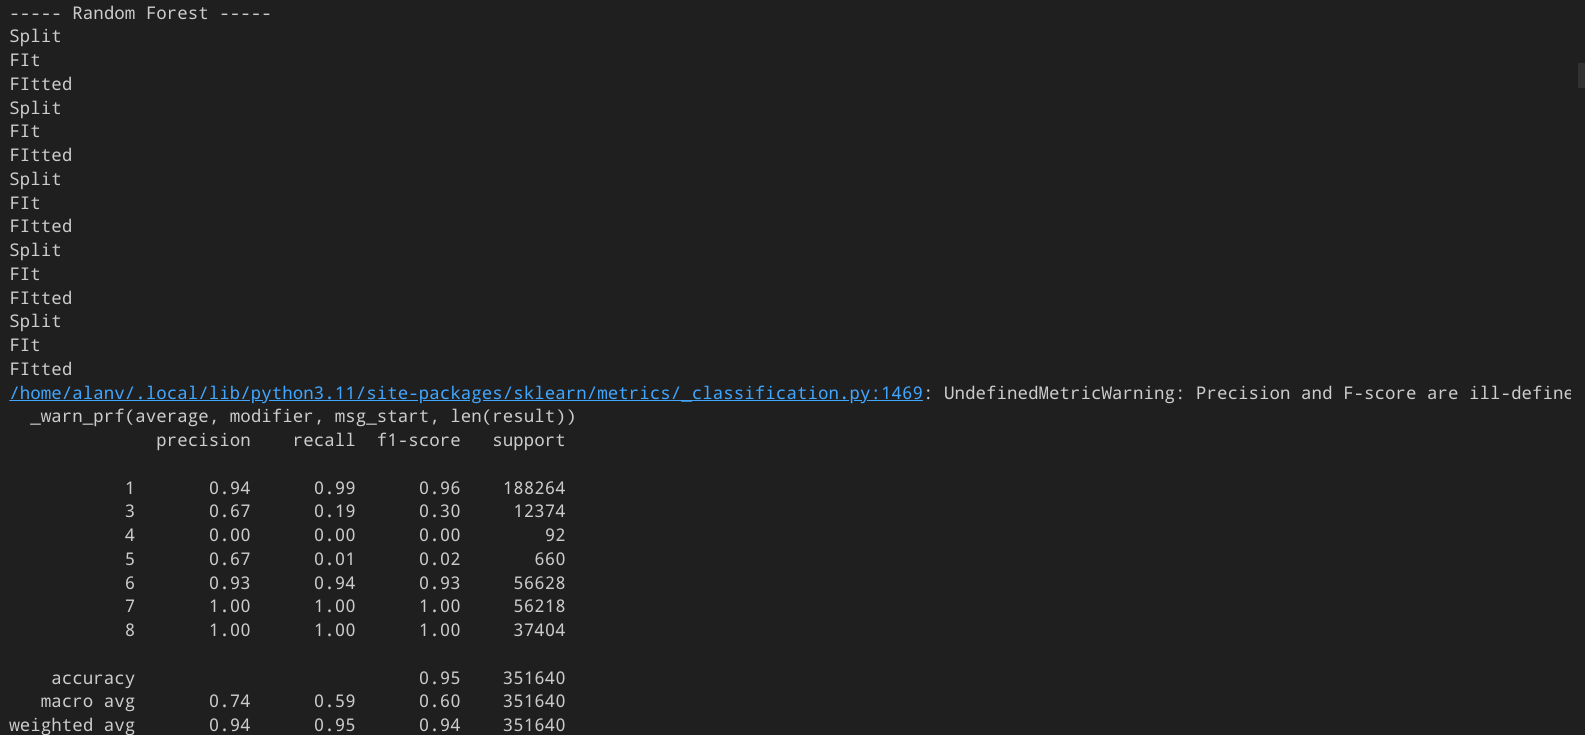

In [ ]:
# 3 dataset changing class weights of class 1 and 4
class_weights = {1: 0.1, 4: 1000} 
# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(x, y):
    print('Split')
    x_train = x[train_index, :]
    y_train = y[train_index]
    x_test = x[test_index, :]
    y_test = y[test_index]
    clf = RandomForestClassifier(class_weight=class_weights) #class_weight='balanced'
    print('FIt')
    clf.fit(x_train, y_train)
    print('FItted')
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

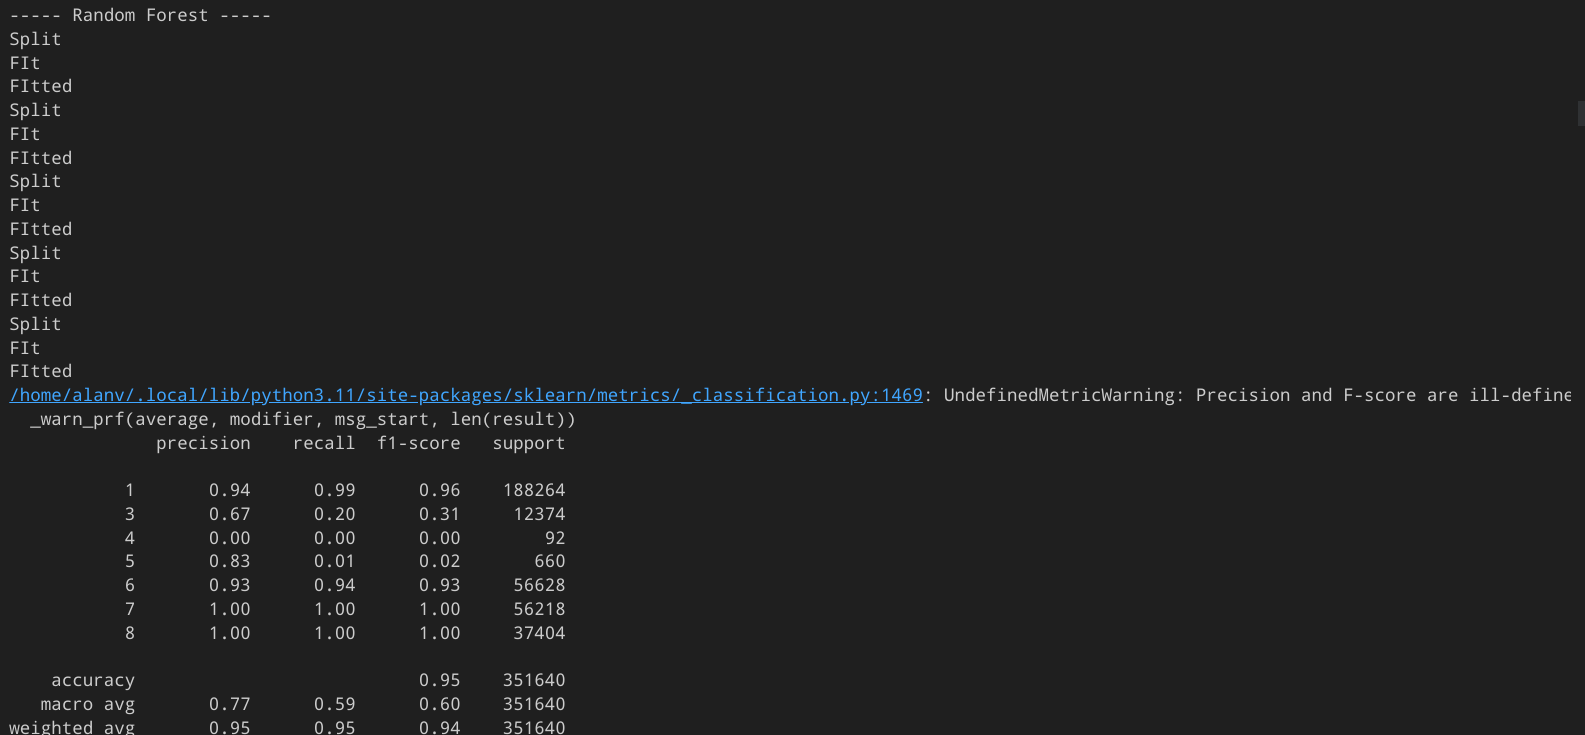

In [3]:
# from the global df set x and y 
x = global_df.iloc[:,1:-1].values
y = global_df.iloc[:,-1].values

In [4]:
#Using SMOTE to oversample the minority classes
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(x, y)
print("Class distribution after SMOTE:", Counter(over_y))

Class distribution after SMOTE: Counter({6: 869690, 3: 869690, 1: 869690, 7: 869690, 8: 869690, 5: 869690, 4: 869690})


In [ ]:
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=4, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(over_X, over_y):
    print('Split')
    x_train = over_X[train_index, :]
    y_train = over_y[train_index]
    x_test = over_X[test_index, :]
    y_test = over_y[test_index]
    clf = RandomForestClassifier() #class_weight='balanced'
    print('FIt')
    clf.fit(x_train, y_train)
    print('FItted')
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

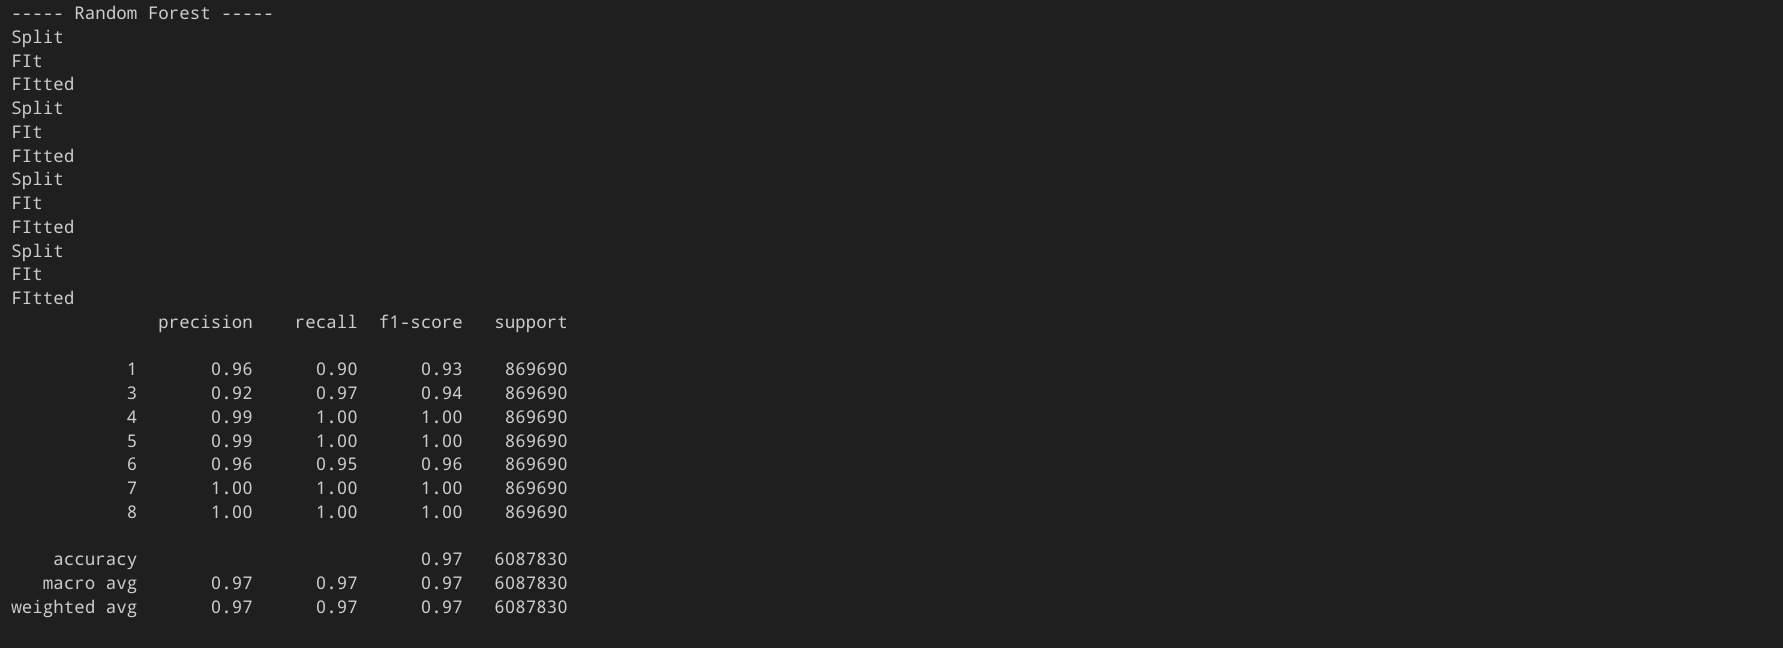

In [5]:
# Undersample to 1% registers of each class from the oversampled data
class_distribution = {1: 8696, 6: 8696, 7: 8696, 8: 8696, 3: 8696, 5: 8696, 4: 8696}
# Create the RandomUnderSampler with the sampling strategy as a dictionary
undersampler = RandomUnderSampler(sampling_strategy=class_distribution)

# Combine the undersampled data for all classes using the sampler
X_undersampled, y_undersampled = undersampler.fit_resample(over_X, over_y)
print("Class distribution after SMOTE:", Counter(y_undersampled))

Class distribution after SMOTE: Counter({1: 8696, 3: 8696, 4: 8696, 5: 8696, 6: 8696, 7: 8696, 8: 8696})


In [6]:
# Test using undersample data
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(X_undersampled, y_undersampled):
    print('Split')
    x_train = X_undersampled[train_index, :]
    y_train = y_undersampled[train_index]
    x_test = X_undersampled[test_index, :]
    y_test = y_undersampled[test_index]
    clf = RandomForestClassifier() #class_weight='balanced'
    print('FIt')
    clf.fit(x_train, y_train)
    print('FItted')
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Random Forest -----
Split
FIt
FItted
Split
FIt
FItted
Split
FIt
FItted
Split
FIt
FItted
Split
FIt
FItted
              precision    recall  f1-score   support

           1       0.77      0.71      0.73      8696
           3       0.66      0.68      0.67      8696
           4       0.88      0.91      0.89      8696
           5       0.85      0.84      0.85      8696
           6       0.83      0.84      0.83      8696
           7       1.00      1.00      1.00      8696
           8       1.00      1.00      1.00      8696

    accuracy                           0.85     60872
   macro avg       0.85      0.85      0.85     60872
weighted avg       0.85      0.85      0.85     60872



In [ ]:
# Oversample 3 csv files 
data = pd.concat([df_501,df_502,df_503])
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
#Using SMOTE to oversample the minority classes
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(x, y)


In [ ]:
# Test using 3 oversampled csv files
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(over_X, over_y):
    print('Split')
    x_train = over_X[train_index, :]
    y_train = over_y[train_index]
    x_test = over_X[test_index, :]
    y_test = over_y[test_index]
    clf = RandomForestClassifier() #class_weight='balanced'
    print('FIt')
    clf.fit(x_train, y_train)
    print('FItted')
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

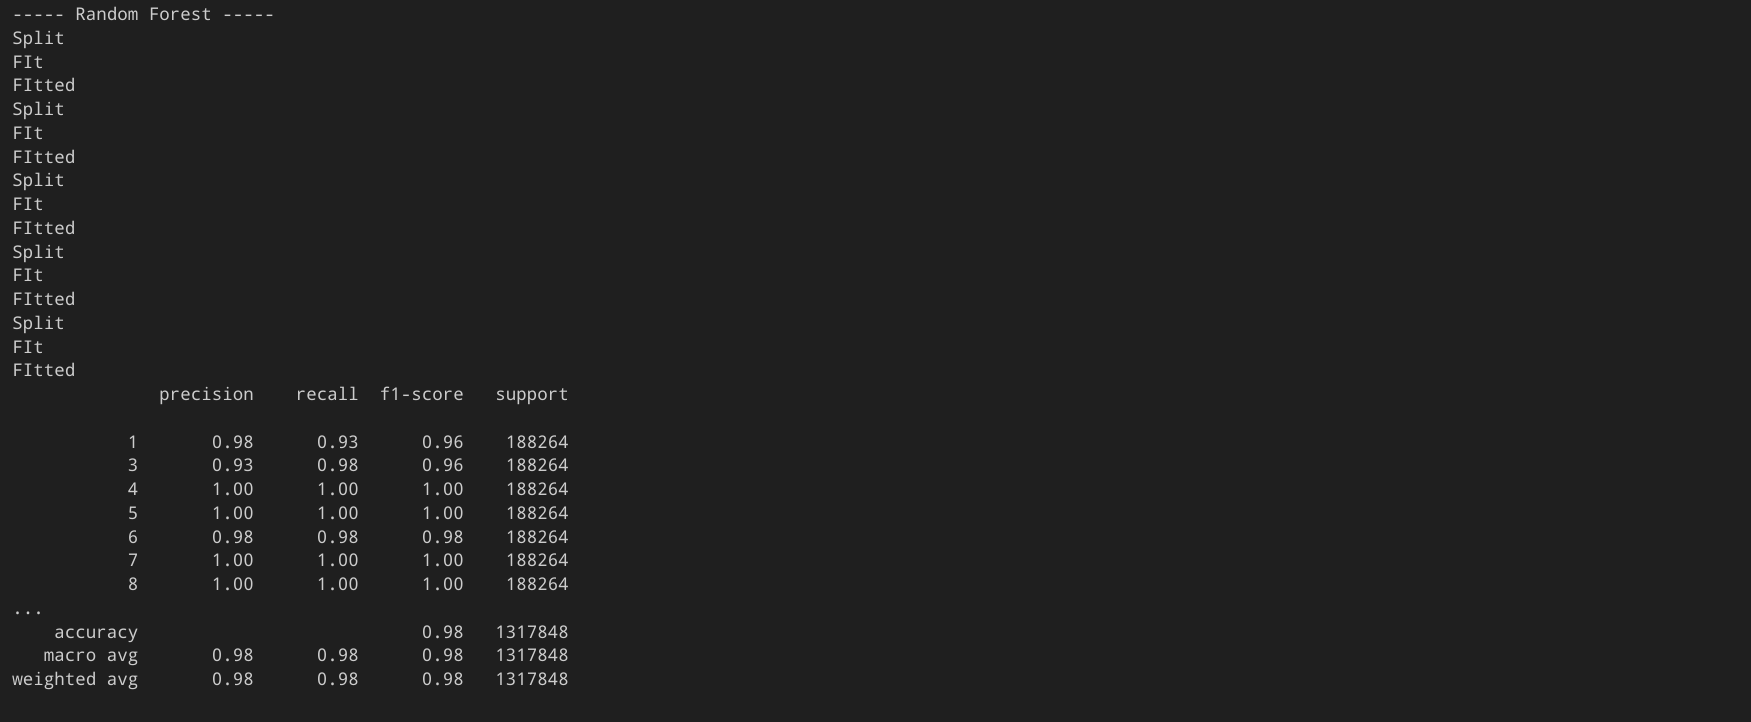

In [ ]:
# Load only one csv file into x and y variables
x = df_501.iloc[:,1:-1].values
y = df_501.iloc[:,-1].values

In [ ]:
#Using SMOTE to oversample the minority classes
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(x, y)
print("Class distribution after SMOTE:", Counter(over_y))

In [ ]:
# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(over_X, over_y):
    print('Split')
    x_train = over_X[train_index, :]
    y_train = over_y[train_index]
    x_test = over_X[test_index, :]
    y_test = over_y[test_index]
    clf = RandomForestClassifier() #class_weight='balanced'
    print('FIt')
    clf.fit(x_train, y_train)
    print('FItted')
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


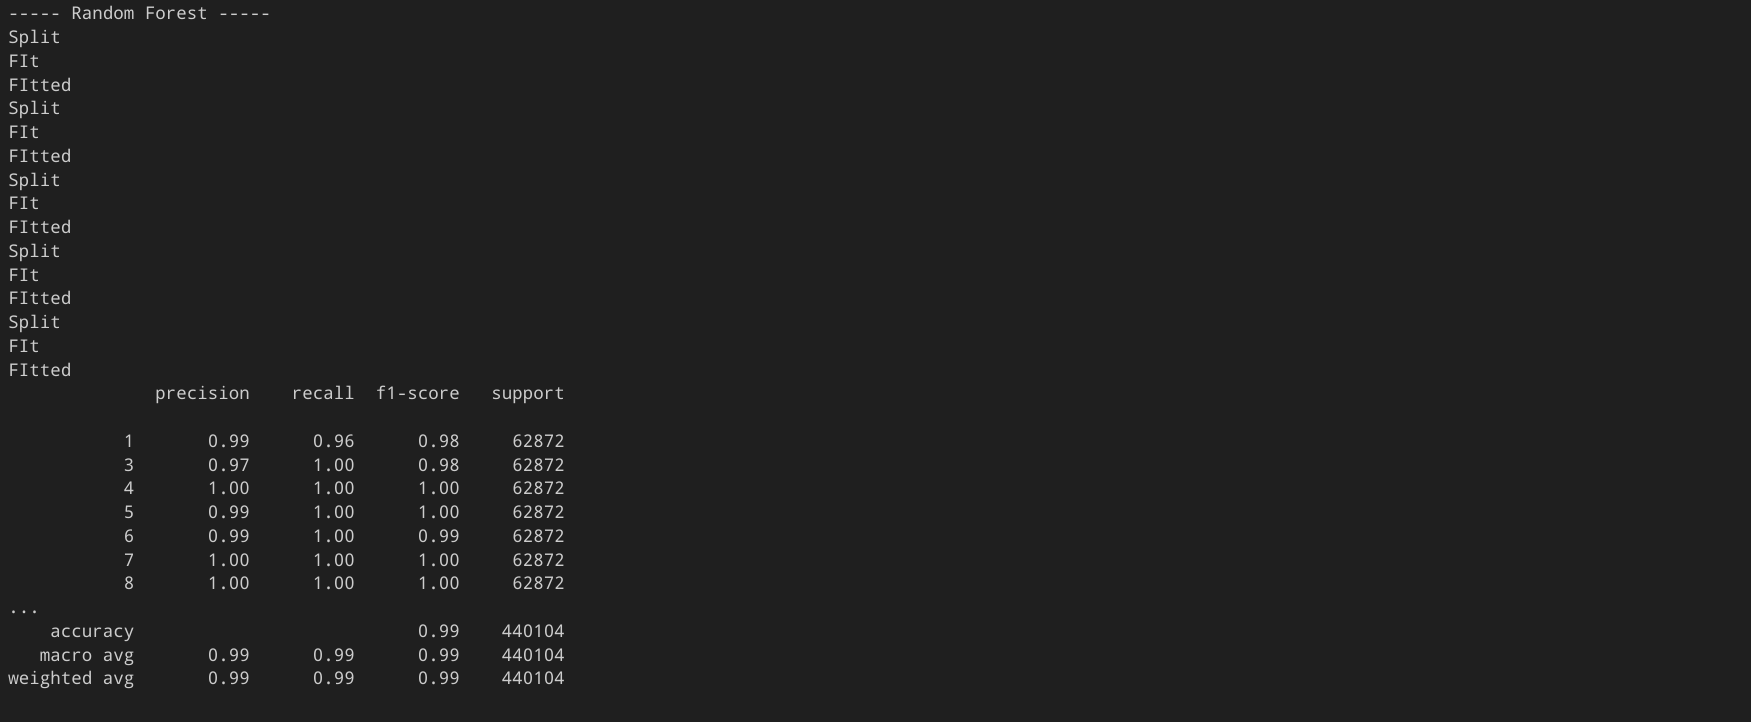

In [3]:
# from the global df set x and y 
x = global_df.iloc[:,1:-1].values
y = global_df.iloc[:,-1].values

In [4]:
#Using SMOTE to oversample the minority classes
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(x, y)
print("Class distribution after SMOTE:", Counter(over_y))

Class distribution after SMOTE: Counter({6: 869690, 3: 869690, 1: 869690, 7: 869690, 8: 869690, 5: 869690, 4: 869690})


In [5]:
# From each oversampled class, get 10000 values
class_distribution = {1: 10000, 6: 10000, 7: 10000, 8: 10000, 3: 10000, 5: 10000, 4: 10000}
# Create the RandomUnderSampler with the sampling strategy as a dictionary
undersampler = RandomUnderSampler(sampling_strategy=class_distribution)

# Combine the undersampled data for all classes using the sampler
over_X, over_y = undersampler.fit_resample(over_X, over_y)
print("Class distribution after SMOTE:", Counter(over_y))

Class distribution after SMOTE: Counter({1: 10000, 3: 10000, 4: 10000, 5: 10000, 6: 10000, 7: 10000, 8: 10000})


In [10]:
# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(over_X, over_y):
    print('Split')
    x_train = over_X[train_index, :]
    y_train = over_y[train_index]
    x_test = over_X[test_index, :]
    y_test = over_y[test_index]
    clf = RandomForestClassifier() #class_weight='balanced'
    print('FIt')
    clf.fit(x_train, y_train)
    print('FItted')
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))


----- Random Forest -----
Split
FIt
FItted
Split
FIt
FItted
Split
FIt
FItted
Split
FIt
FItted
Split
FIt
FItted
              precision    recall  f1-score   support

           1       0.77      0.70      0.73     10000
           3       0.67      0.71      0.69     10000
           4       0.88      0.92      0.90     10000
           5       0.85      0.85      0.85     10000
           6       0.84      0.84      0.84     10000
           7       1.00      1.00      1.00     10000
           8       1.00      1.00      1.00     10000

    accuracy                           0.86     70000
   macro avg       0.86      0.86      0.86     70000
weighted avg       0.86      0.86      0.86     70000



## Selección de características con el método Filter


----- Optimal selection of number of features -----
---- n features = 1
ACC: 0.5080857142857143
---- n features = 2
ACC: 0.6159857142857142
---- n features = 3
ACC: 0.7163
---- n features = 4
ACC: 0.7959285714285714
---- n features = 5
ACC: 0.8304
---- n features = 6
ACC: 0.8578428571428571
Optimal number of features:  6


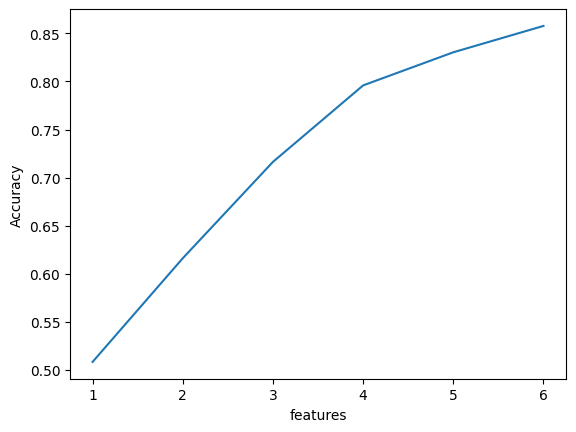

Selected features:  ['x0' 'x1' 'x2' 'x3' 'x4' 'x5']


In [6]:
# Find optimal number of features using cross-validation filter
################################################################################
print("----- Optimal selection of number of features -----")
n = over_X.shape[1]  
n_feats = [i for i in range(1, n + 1)]


acc_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(over_X, over_y):
        # Training phase
        x_train = over_X[train_index, :]
        y_train = over_y[train_index]
        clf_cv = RandomForestClassifier() 
        fselection_cv = SelectKBest(f_classif, k = n_feat) #SVC(kernel = 'linear')
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
        # Test phase
        x_test = fselection_cv.transform(over_X[test_index, :])
        y_test = over_y[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)
    
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()
# Fit model with optimal number of features
clf = RandomForestClassifier()
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(over_X, over_y)
print("Selected features: ", fselection.get_feature_names_out())

## Selección de características con el método Wrapper

In [ ]:
# Find optimal number of features using cross-validation wrapper, didnt work since the waiting times were too long
################################################################################
print("----- Optimal selection of number of features -----")
n = over_X.shape[1]  
n_feats = [i for i in range(1, n + 1)]


acc_nfeat = []
for n_feat in n_feats:
    print('---- n features =', n_feat)
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle = True)
    for train_index, test_index in kf.split(over_X, over_y):
        # Training phase
        x_train = over_X[train_index, :]
        y_train = over_y[train_index]
        clf_cv = RandomForestClassifier() 
        fselection_cv = SequentialFeatureSelector(clf_cv,
        n_features_to_select=n_feat)
        fselection_cv.fit(x_train, y_train)
        x_train = fselection_cv.transform(x_train)
        clf_cv.fit(x_train, y_train)
        # Test phase
        x_test = fselection_cv.transform(over_X[test_index, :])
        y_test = over_y[test_index]
        y_pred = clf_cv.predict(x_test)
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)
    acc = np.average(acc_cv)
    acc_nfeat.append(acc)
    print('ACC:', acc)
    
opt_index = np.argmax(acc_nfeat)
opt_features = n_feats[opt_index]
print("Optimal number of features: ", opt_features)
plt.plot(n_feats, acc_nfeat)
plt.xlabel("features")
plt.ylabel("Accuracy")
plt.show()
# Fit model with optimal number of features
clf = RandomForestClassifier()
fselection = SelectKBest(f_classif, k = opt_features)
fselection.fit(over_X, over_y)
print("Selected features: ", fselection.get_feature_names_out())
xBestFilter = fselection.get_feature_names_out()
x_transformed = fselection.transform(over_X)
clf.fit(x_transformed, over_y)

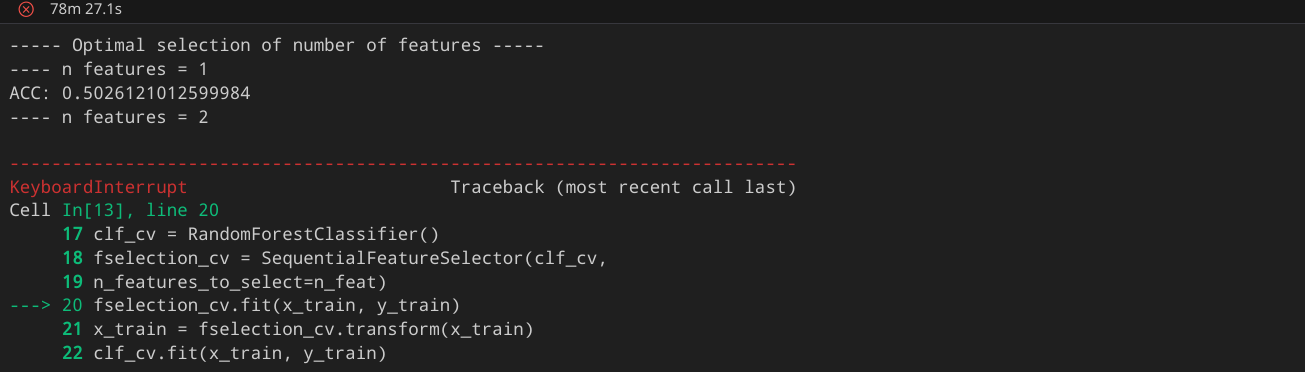

## Ajuste de hiperparámetros

In [ ]:
# Find best hyperparameters using a Randomized choser
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'max_features': ['auto', 'sqrt', 'log2']
}

# Create the SVM classifier
clf = RandomForestClassifier()

# Create the GridSearchCV object, cv = cross validation
grid_search = RandomizedSearchCV(estimator=clf, param_distributions= param_grid, cv = 5, n_iter=10)
# Perform the grid search
grid_search.fit(over_X, over_y)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Print the classification report for the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(over_X)
print("Classification Report:")
print(classification_report(over_y, y_pred))

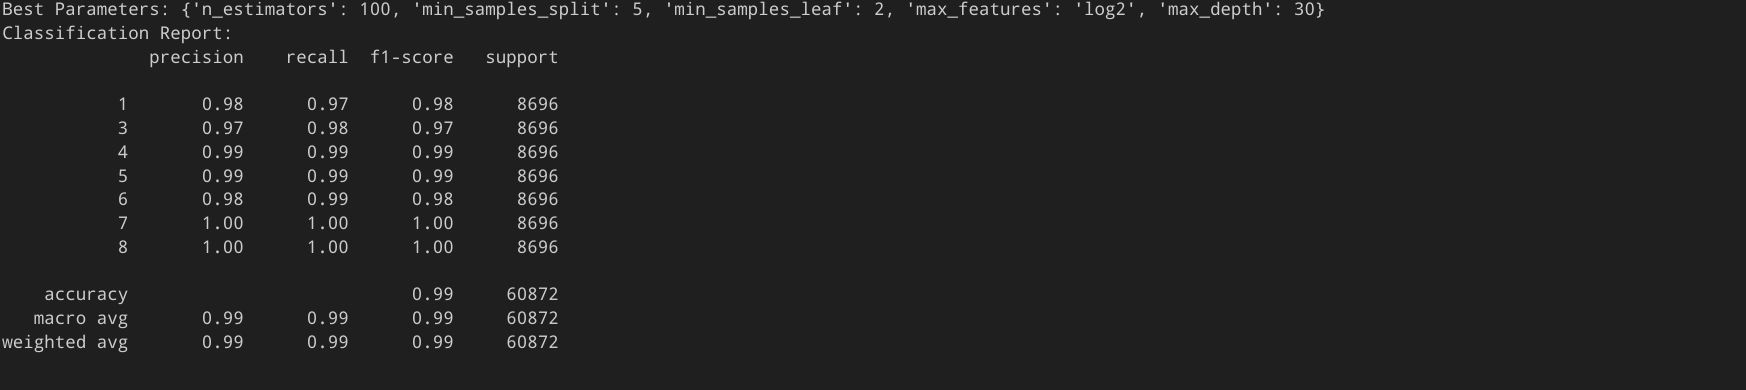

In [ ]:
print("----- Model evaluation with cross_val_predict -----")
clf = RandomForestClassifier(n_estimators= 100, min_samples_split= 5, min_samples_leaf= 2, max_depth= 30, max_features='log2')
y_pred = cross_val_predict(clf, over_X, over_y, cv = 5)
print(classification_report(over_y, y_pred))

In [ ]:
# Hyperparameters using GridSearchCV

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the SVM classifier
clf = RandomForestClassifier()

# Create the GridSearchCV object, cv = cross validation
grid_search = GridSearchCV(estimator=clf, param_grid= param_grid, cv = 5)
# Perform the grid search
grid_search.fit(over_X, over_y)

# Print the best hyperparameters
print("Best Parameters:", grid_search.best_params_)

# Print the classification report for the best model
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(over_X)
print("Classification Report:")
print(classification_report(over_y, y_pred))

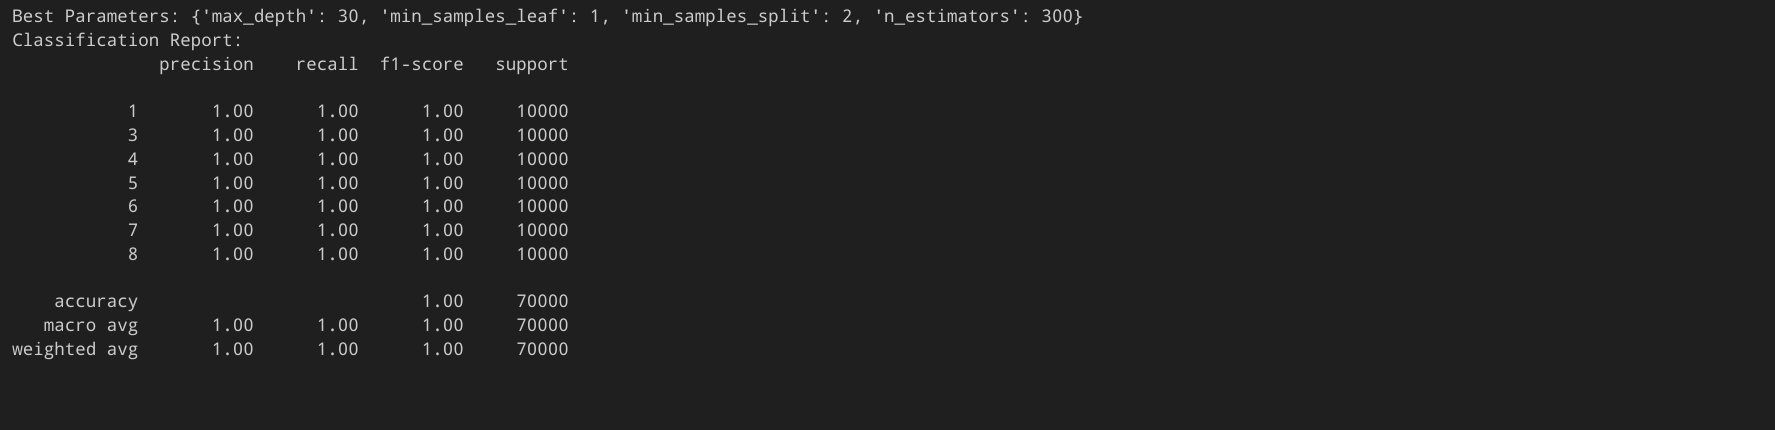

## Probar el modelo para producción

In [6]:
# Random Forest
print('----- Random Forest -----')
kf = StratifiedKFold(n_splits=5, shuffle = True)
cv_y_test = []
cv_y_pred = []

for train_index, test_index in kf.split(over_X, over_y):
    print('Split')
    x_train = over_X[train_index, :]
    y_train = over_y[train_index]
    x_test = over_X[test_index, :]
    y_test = over_y[test_index]
    clf = RandomForestClassifier(n_estimators= 300, min_samples_split= 2, min_samples_leaf= 1, max_depth= 30) #class_weight='balanced'
    print('FIt')
    clf.fit(x_train, y_train)
    print('FItted')
    y_pred = clf.predict(x_test)
    cv_y_test.append(y_test)
    cv_y_pred.append(y_pred)

print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

----- Random Forest -----
Split
FIt
FItted
Split
FIt
FItted
Split
FIt
FItted
Split
FIt
FItted
Split
FIt
FItted
              precision    recall  f1-score   support

           1       0.78      0.70      0.74     10000
           3       0.67      0.70      0.69     10000
           4       0.89      0.92      0.90     10000
           5       0.85      0.87      0.86     10000
           6       0.83      0.84      0.84     10000
           7       1.00      1.00      1.00     10000
           8       1.00      1.00      1.00     10000

    accuracy                           0.86     70000
   macro avg       0.86      0.86      0.86     70000
weighted avg       0.86      0.86      0.86     70000



In [9]:
y_pred = clf.predict(over_X)
#y_pred = cross_val_predict(model, x, y, cv = 5)
print("Classification Report:")
print(classification_report(over_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.71      0.74    869690
           3       0.67      0.70      0.69    869690
           4       0.88      0.92      0.90    869690
           5       0.85      0.86      0.86    869690
           6       0.83      0.84      0.84    869690
           7       1.00      1.00      1.00    869690
           8       1.00      1.00      1.00    869690

    accuracy                           0.86   6087830
   macro avg       0.86      0.86      0.86   6087830
weighted avg       0.86      0.86      0.86   6087830



Text(0.5, 1.0, 'Confusion matrix')

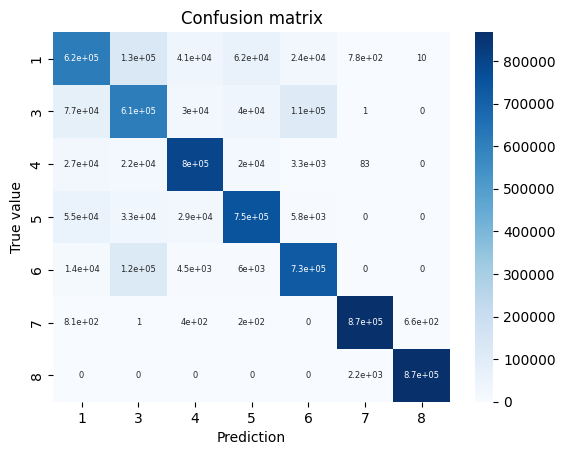

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
c_m = confusion_matrix(over_y, y_pred)

# Graficar la matriz de confusión
sns.heatmap(c_m, annot=True, annot_kws={"size": 6}, cmap='Blues',
            xticklabels=['1', '3', '4', '5', '6', '7', '8'],
            yticklabels=['1', '3', '4', '5', '6', '7', '8'])
plt.ylabel('True value')
plt.xlabel('Prediction')
plt.title('Confusion matrix')

## Exportar modelo

In [14]:
import pickle
with open('random_forest_model.pkl', 'wb') as f:
  pickle.dump(clf, f, protocol=4)

## Probar el modelo para producción

In [8]:
# from the global df set x and y 
x = global_df.iloc[:,1:-1].values
y = global_df.iloc[:,-1].values
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(x, y)

In [ ]:
#Evaluate using oversamplet data 
model = joblib.load('best_model.pkl')
y_pred = model.predict(over_X)
#y_pred = cross_val_predict(model, x, y, cv = 5)
print("Classification Report:")
print(classification_report(over_y, y_pred))

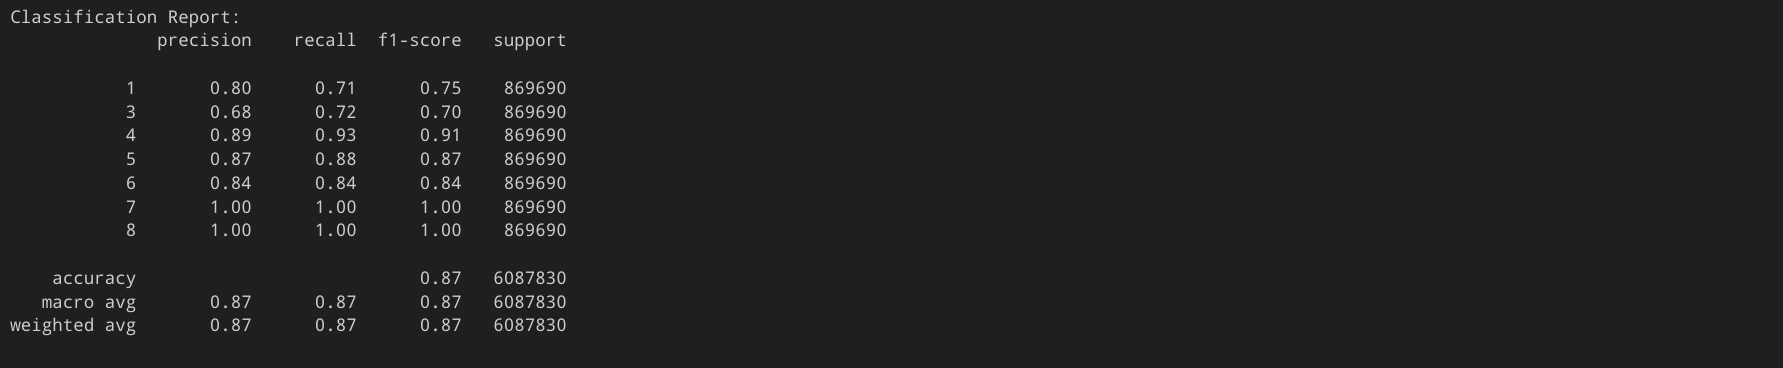

In [ ]:
# Evaluate using original data
model = joblib.load('best_model.pkl')
y_pred = model.predict(x)
#y_pred = cross_val_predict(model, x, y, cv = 5)
print("Classification Report:")
print(classification_report(y, y_pred))

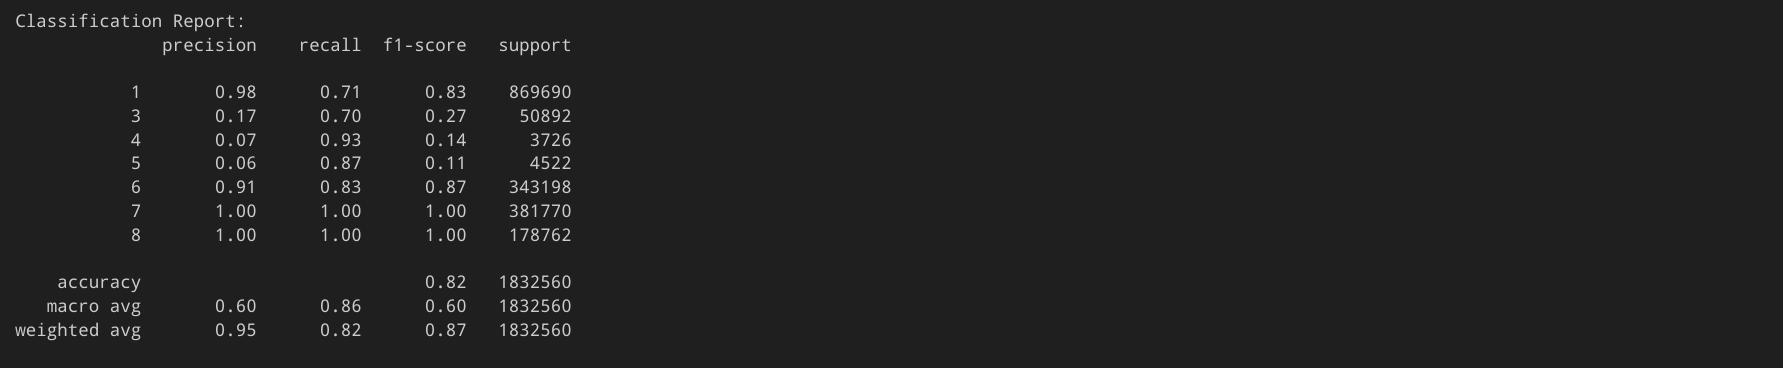